In [60]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

In [114]:
style.use('fivethirtyeight')

In [61]:
df = pd.read_csv('./data/beach_water_quality_2013-present')

In [62]:
df.drop(0, inplace=True) # Drop first row, leftover header

In [63]:
df.head()

,beach_name,measurement_timestamp,water_temperature,turbidity,transducer_depth,wave_height,wave_period,battery_life,measurement_timestamp_label,measurement_id
1,Ohio Street Beach,2020-07-22T11:00:00.000,23,0.58,NaN,0.085,3,10.5,07/22/2020 11:00 AM,OhioStreetBeach202007221100
2,Ohio Street Beach,2020-07-11T22:00:00.000,23.8,0.44,NaN,0.141,4,11,07/11/2020 10:00 PM,OhioStreetBeach202007112200
3,Ohio Street Beach,2020-07-10T23:00:00.000,22.1,1.06,NaN,0.233,4,11,07/10/2020 11:00 PM,OhioStreetBeach202007102300
4,Ohio Street Beach,2020-07-10T16:00:00.000,25.2,2.43,NaN,0.245,5,11,07/10/2020 4:00 PM,OhioStreetBeach202007101600
5,Ohio Street Beach,2020-07-10T05:00:00.000,24.8,0.81,NaN,0.14,3,11.1,07/10/2020 5:00 AM,OhioStreetBeach202007100500


In [64]:
df.isnull().mean()

beach_name                     0.000000
measurement_timestamp          0.000000
water_temperature              0.000000
turbidity                      0.000000
transducer_depth               0.747718
wave_height                    0.005707
wave_period                    0.005707
battery_life                   0.000000
measurement_timestamp_label    0.000000
measurement_id                 0.000000
dtype: float64

Some null values in `transducer_depth`, `wave_height`, and `wave_period`

In [65]:
df['measurement_timestamp'] = pd.to_datetime(df['measurement_timestamp'])

In [66]:
df.set_index('measurement_timestamp', inplace=True)

In [67]:
df.sort_index(inplace=True)

In [106]:
df[['water_temperature', 'turbidity', 'transducer_depth', 'wave_period', 'wave_height', 'battery_life']] = df[['water_temperature', 'turbidity', 'transducer_depth', 'wave_period', 'wave_height', 'battery_life']].astype('float32')

In [107]:
df['wave_period'].fillna(0, inplace=True)

In [108]:
df['wave_period'] = df['wave_period'].astype('int')

In [109]:
df = df[df['wave_height'] >= 0]

In [111]:
df.describe()

,water_temperature,turbidity,transducer_depth,wave_height,wave_period,battery_life
count,38895.000000,38895.000000,10034.000000,38895.000000,38895.000000,38895.000000
mean,19.487274,4.226591,1.570234,0.173162,3.872117,11.073275
std,3.384996,26.217693,0.175118,0.084790,1.551153,0.659049
min,0.000000,0.000000,-0.082000,0.013000,1.000000,0.000000
25%,17.100000,0.690000,1.426000,0.113000,3.000000,10.600000
50%,19.700001,1.260000,1.578000,0.157000,3.000000,11.000000
75%,22.200001,2.420000,1.721000,0.204000,4.000000,11.500000
max,29.200001,1190.020020,2.214000,1.467000,10.000000,13.300000


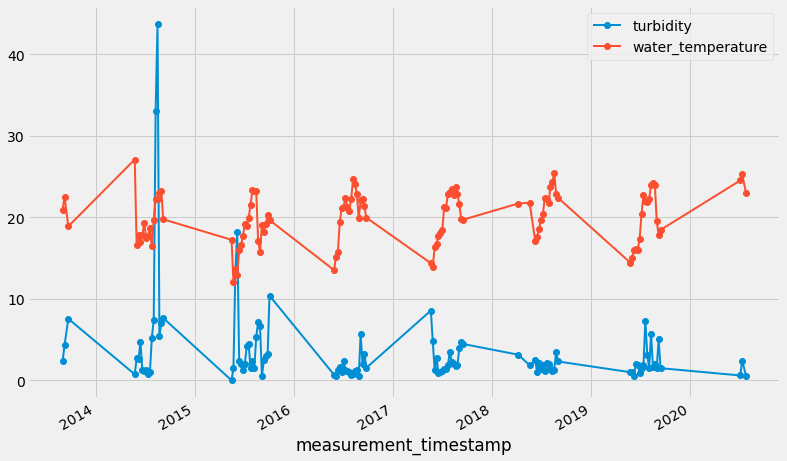

In [132]:
df.resample('W').mean().dropna(subset=['turbidity'])[['turbidity', 'water_temperature']].plot(marker='o', linestyle=None, linewidth=2, figsize=(12, 8));

<AxesSubplot:>

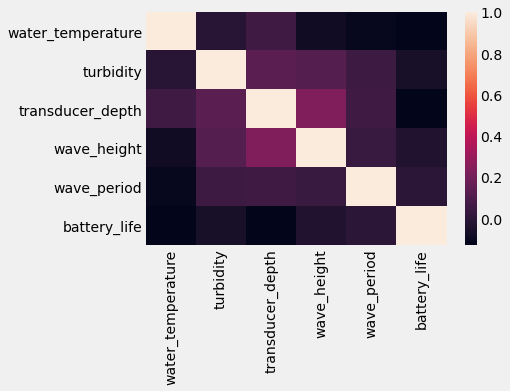

In [118]:
sns.heatmap(df.corr())